In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv("C:/Users/RAMA/Downloads/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [4]:
data.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.shape

(3150, 5)

In [6]:
data.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [7]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
data[data['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback


In [9]:
data['length']=data['verified_reviews'].apply(len)

In [10]:
data.head(10)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


In [11]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

# Analyzing 'rating' column

In [12]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

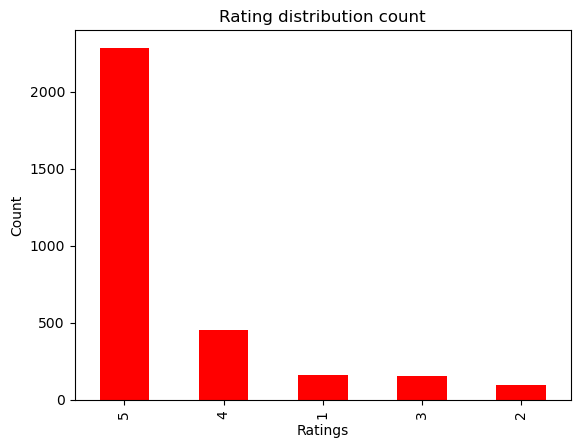

In [13]:
data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
data['rating'].value_counts()/data.shape[0]*100

5    72.571429
4    14.444444
1     5.111111
3     4.825397
2     3.047619
Name: rating, dtype: float64

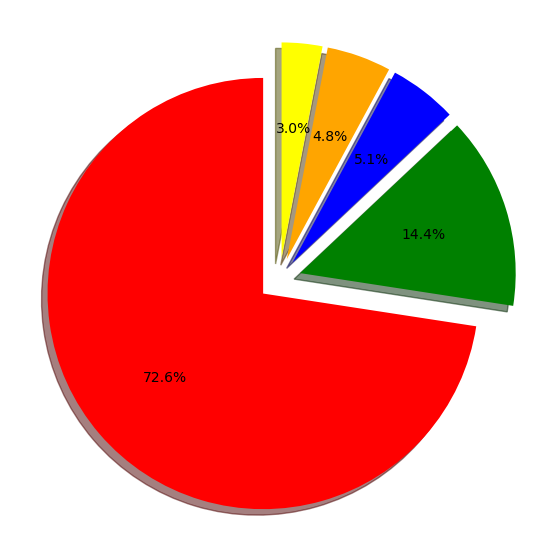

In [15]:
y = data['rating'].value_counts()
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
explode=(0.1,0.1,0.1,0.1,0.1)
plt.pie(y,autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, explode=explode)
plt.show()

# Analyzing 'feedback' column 

In [16]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [17]:
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [18]:
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

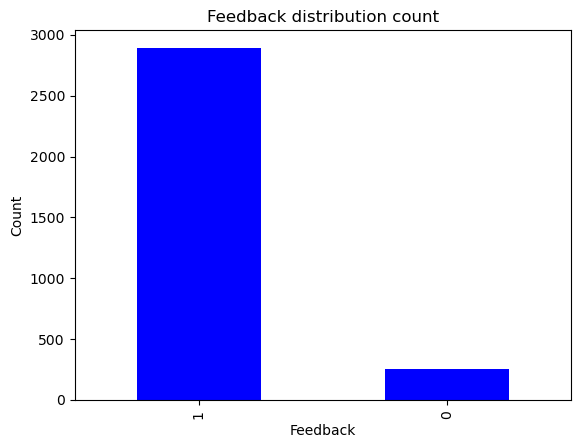

In [19]:
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [20]:
data['feedback'].value_counts()/data.shape[0]*100

1    91.84127
0     8.15873
Name: feedback, dtype: float64

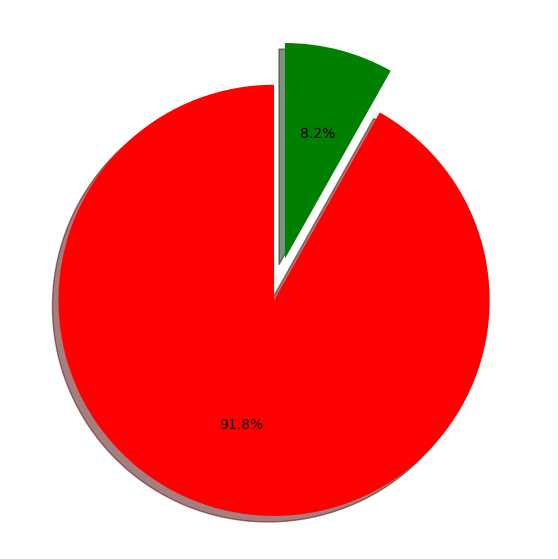

In [21]:
y = data['feedback'].value_counts()
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
explode=(0.1,0.1)
plt.pie(y,autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, explode=explode)
plt.show()

In [22]:
data[data['feedback'] == 0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [23]:
data[data['feedback'] == 1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

## Analyzing 'variation' column
This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [24]:
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

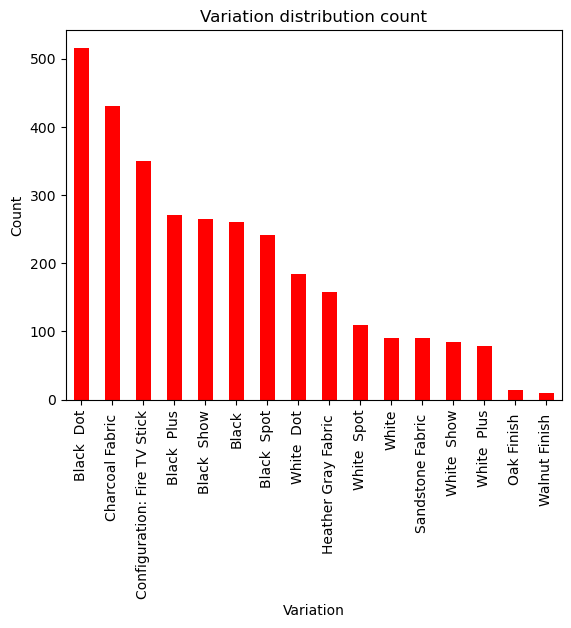

In [25]:
data['variation'].value_counts().plot.bar(color = 'red')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [26]:
data['variation'].value_counts()/data.shape[0]*100

Black  Dot                      16.380952
Charcoal Fabric                 13.650794
Configuration: Fire TV Stick    11.111111
Black  Plus                      8.571429
Black  Show                      8.412698
Black                            8.285714
Black  Spot                      7.650794
White  Dot                       5.841270
Heather Gray Fabric              4.984127
White  Spot                      3.460317
White                            2.888889
Sandstone Fabric                 2.857143
White  Show                      2.698413
White  Plus                      2.476190
Oak Finish                       0.444444
Walnut Finish                    0.285714
Name: variation, dtype: float64

# Analyzing 'verified_reviews' column

In [27]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

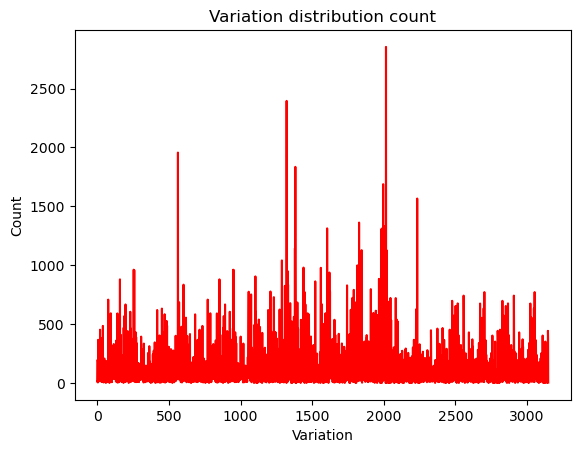

In [28]:
data['length'].plot.line(color = 'red')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

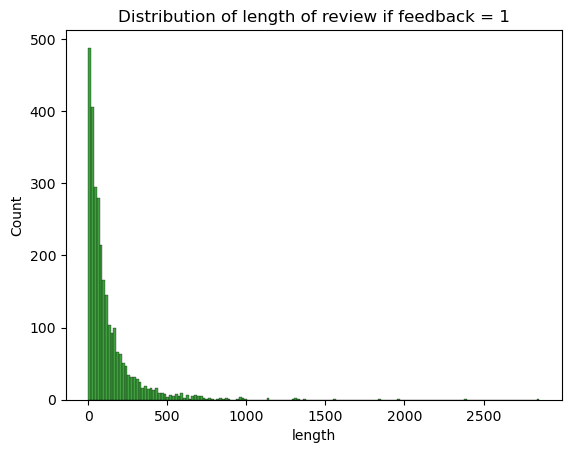

In [29]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

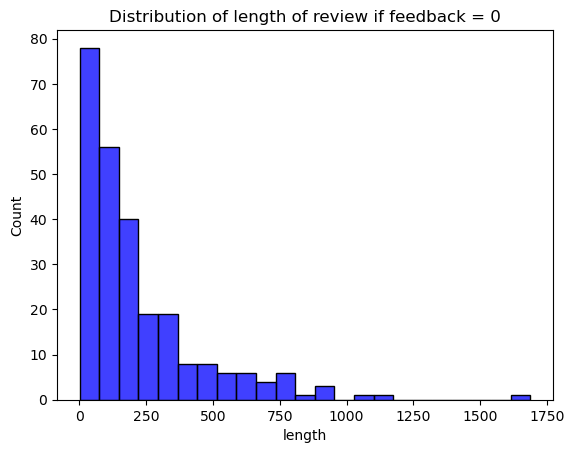

In [30]:
sns.histplot(data[data['feedback']==0]['length'],color='blue').set(title='Distribution of length of review if feedback = 0')

In [31]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

In [32]:
%pip install --upgrade pip

%pip install --upgrade Pillow

     ---------------------------------------- 2.1/2.1 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
    --------------------------------------- 0.1/2.5 MB 2.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.5 MB 2.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.5 MB 2.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.5 MB 2.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.5 MB 2.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.5 MB 2.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.5 MB 2.7 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.5 MB 2.9 MB/s eta 0:00:01
   ----------------- ---------------

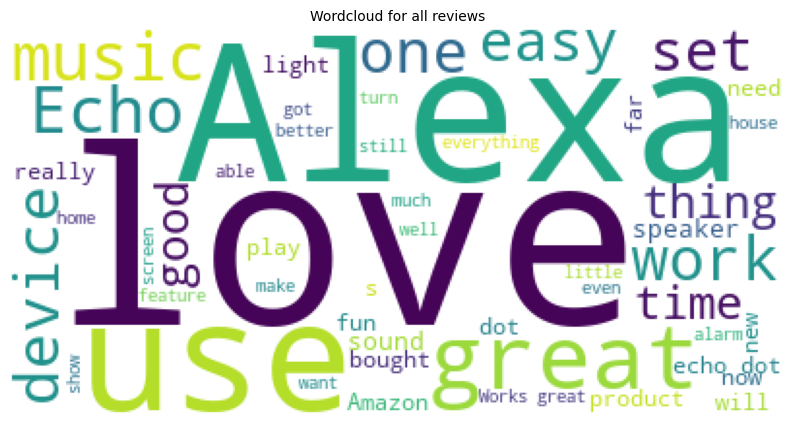

In [33]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.imshow(wc.generate(reviews))
plt.axis('off')
plt.show()


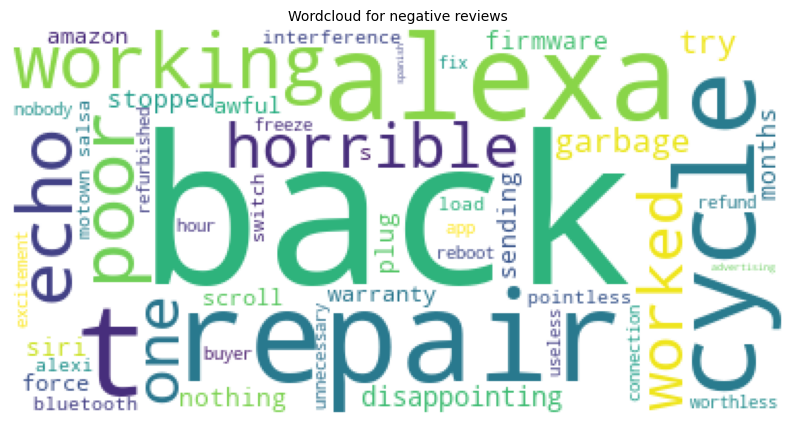

In [35]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

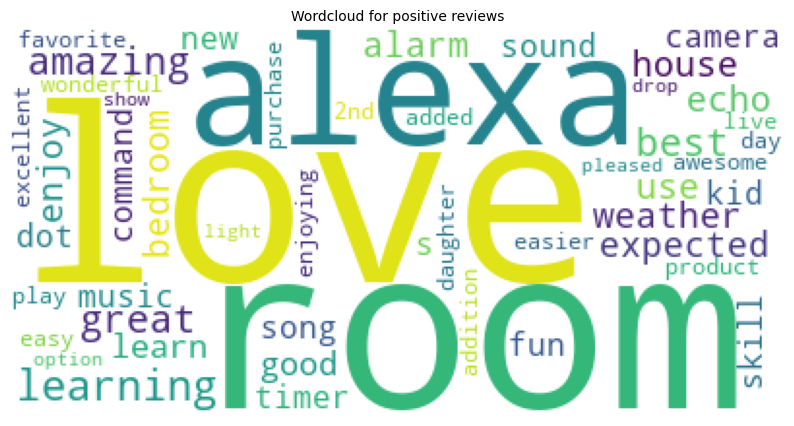

In [36]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()
